#  Fruits: Retail Prices of Agricultural Commodities by Geolocation, Commodity, Year and Period
Problems: 
1. What fruit prices are expected to increase and decrease?
2. What place/s sell fruits at higher prices
3. Does seasons affect fruit prices

Goal:
1. Find the specialty of each province.
2. Forecast fruit prices.
3. Find out the effect of seasons on fruit prices.

dataset from:\
https://openstat.psa.gov.ph/PXWeb/pxweb/en/DB/DB__2M__2018/0042M4ARA07.px/?rxid=7d5d3588-67ae-4206-8670-09322cda2f17

# Methodology
1. Reading and Understanding the Data\
a. Creating a Data Dictionary
2. Data Cleaning
3. Data Preparation
4. Statistical Data Analysis\
a. Univariate Analysis\
b. Bivariate Analysis
5. Final Analysis

### 1. Reading and Understanding the Data

In [1]:
# import libraries for dataframe and visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# 1. Reading the data on which analysis needs to be done

df = pd.read_excel("Retail prices of fruits by region 2018-2024.xlsx", header=3)
df = df[:-31]

df.tail(5)

,Unnamed: 0,Unnamed: 1,January,February,March,April,May,June,July,August,...,April.6,May.6,June.6,July.6,August.6,September.6,October.6,November.6,December.6,Annual.6
643,NaN,"FRESH FRUIT, MANDARIN, DALANGHITA, MEDIUM, 1 KG",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
644,NaN,"CALAMANSI, LOOSE, 1 KG",119.9,119.9,130.43,119.89,119.89,121.5,120.22,120.97,...,56.17,56.67,58.46,56.78,56.71,57.57,..,..,..,..
645,NaN,"FRESH FRUIT, APPLE, RED DELICIOUS, MEDIUM, 1 KG",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
646,NaN,"FRESH FRUIT, CANTALOUPE, MELON, MEDIUM, 1 KG",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
647,NaN,"FRESH FRUIT, WATERMELON, PAKWAN, MEDIUM, 1 KG",18.51,18.51,17.77,19.75,19.75,19.75,19.75,19.75,...,34.58,33.33,31,31.67,31.33,33.5,..,..,..,..


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 93 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   18 non-null     object
 1   Unnamed: 1   648 non-null    object
 2   January      648 non-null    object
 3   February     648 non-null    object
 4   March        648 non-null    object
 5   April        648 non-null    object
 6   May          648 non-null    object
 7   June         648 non-null    object
 8   July         648 non-null    object
 9   August       648 non-null    object
 10  September    648 non-null    object
 11  October      648 non-null    object
 12  November     648 non-null    object
 13  December     648 non-null    object
 14  Annual       648 non-null    object
 15  January.1    648 non-null    object
 16  February.1   648 non-null    object
 17  March.1      648 non-null    object
 18  April.1      648 non-null    object
 19  May.1        648 non-null    

In [4]:
df.describe()

,Unnamed: 0,Unnamed: 1,January,February,March,April,May,June,July,August,...,April.6,May.6,June.6,July.6,August.6,September.6,October.6,November.6,December.6,Annual.6
count,18,648,648,648,648,648,648,648,648,648,...,648,648,648,648,648,648,648,648,648,648
unique,18,36,288,286,288,289,287,287,288,287,...,283,281,278,270,280,278,1,1,1,1
top,PHILIPPINES,"FRESH FRUIT, AVOCADO, 1 KG",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,1,18,358,358,358,358,358,358,358,358,...,358,358,358,358,358,358,648,648,648,648


In [5]:
df.replace("..", np.nan, inplace=True)

<Axes: >

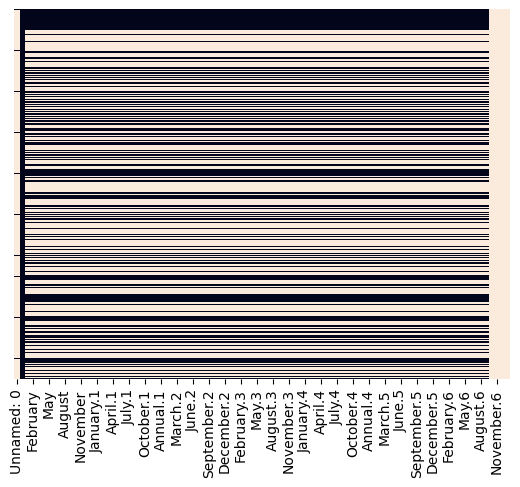

In [6]:
# check for nulls
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [7]:
df.tail(5)

,Unnamed: 0,Unnamed: 1,January,February,March,April,May,June,July,August,...,April.6,May.6,June.6,July.6,August.6,September.6,October.6,November.6,December.6,Annual.6
643,NaN,"FRESH FRUIT, MANDARIN, DALANGHITA, MEDIUM, 1 KG",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,NaN,"CALAMANSI, LOOSE, 1 KG",119.90,119.90,130.43,119.89,119.89,121.50,120.22,120.97,...,56.17,56.67,58.46,56.78,56.71,57.57,NaN,NaN,NaN,NaN
645,NaN,"FRESH FRUIT, APPLE, RED DELICIOUS, MEDIUM, 1 KG",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,NaN,"FRESH FRUIT, CANTALOUPE, MELON, MEDIUM, 1 KG",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,NaN,"FRESH FRUIT, WATERMELON, PAKWAN, MEDIUM, 1 KG",18.51,18.51,17.77,19.75,19.75,19.75,19.75,19.75,...,34.58,33.33,31.00,31.67,31.33,33.50,NaN,NaN,NaN,NaN


In [8]:
# Calculating the Missing Values % contribution in DF
df_null = round(100*(df.isnull().sum())/len(df), 2)
# Convert the Series to a DataFrame and display it
df_null = df_null.reset_index()
df_null.columns = ['Column', 'Percentage']
df_null

,Column,Percentage
0,Unnamed: 0,97.22
1,Unnamed: 1,0.00
2,January,55.25
3,February,55.25
4,March,55.25
...,...,...
88,September.6,55.25
89,October.6,100.00
90,November.6,100.00
91,December.6,100.00


### 2. Data Cleaning

In [9]:
# Forward-fill the regions (Unnamed: 0) and product names (Unnamed: 1) to deal with the multi-level structure
df['Unnamed: 0'].fillna(method='ffill', inplace=True)  # Regions
df['Unnamed: 1'].fillna(method='ffill', inplace=True)  # Products


df.rename(columns={'Unnamed: 0': 'Region', 'Unnamed: 1': 'Product'}, inplace=True)

df_cleaned = df.loc[:, ~df.columns.str.contains('Annual')]

years = []
current_year = 2018  

for col in df_cleaned.columns[2:]:  
    if 'January' in col:
        years.append(str(current_year))
        current_year += 1
    else:
        years.append(str(current_year - 1))  

# Assign the months in a repeating sequence (January to December)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_repeated = months * (len(df_cleaned.columns[2:]) // 12)

# Create a MultiIndex for the columns with Year and Month
df_cleaned.columns = pd.MultiIndex.from_tuples([('Region', ''), ('Product', '')] + list(zip(years, months_repeated)))

# Melt the data with Region and Product as identifiers
df_melted = pd.melt(
    df_cleaned, 
    id_vars=['Region', 'Product'], 
    var_name=['Year', 'Month'], 
    value_name='Price'
)

# Replace '..' with NaN and drop rows where Price is NaN
df_melted.replace('..', pd.NA, inplace=True)
df_melted.dropna(subset=['Price'], inplace=True)

df_melted.tail() 

C:\Users\k3n\AppData\Local\Temp\ipykernel_25032\1457148109.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\k3n\AppData\Local\Temp\ipykernel_25032\1457148109.py:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,Region,Product,Year,Month,Price
52473,..AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"FRESH FRUIT, GRAPES, 1 KG",2024,September,305.00
52478,..AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"FRESH FRUIT, LANZONES, 1 KG",2024,September,59.00
52479,..AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"FRESH FRUIT, RAMBUTAN, 1 KG",2024,September,60.00
52484,..AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"CALAMANSI, LOOSE, 1 KG",2024,September,57.57
52487,..AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"FRESH FRUIT, WATERMELON, PAKWAN, MEDIUM, 1 KG",2024,September,33.50


In [10]:
df_melted.to_csv('prutas_long.csv')

In [11]:
df_melted['Region'] = df_melted['Region'].str.replace('.', '', regex=False)
df_melted.tail(5)

,Region,Product,Year,Month,Price
52473,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"FRESH FRUIT, GRAPES, 1 KG",2024,September,305.00
52478,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"FRESH FRUIT, LANZONES, 1 KG",2024,September,59.00
52479,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"FRESH FRUIT, RAMBUTAN, 1 KG",2024,September,60.00
52484,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"CALAMANSI, LOOSE, 1 KG",2024,September,57.57
52487,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"FRESH FRUIT, WATERMELON, PAKWAN, MEDIUM, 1 KG",2024,September,33.50


In [12]:
# # Extract the abbreviation enclosed in parentheses from the Region column
# df_melted['Region Abbreviation'] = df_melted['Region'].str.extract(r'\((.*?)\)')

# # Remove the copied part in Region
# df_melted['Region'] = df_melted['Region'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

# df_melted.head()

In [13]:
# creating data dictionary

import_des = {
    "Region": "Geographical area where the data was collected",
    "Product": "Fruit being analyzed",
    "Year": "Year of the recorded price",
    "Month": "Month of the recorded price",
    "Price": "Retail price of the fruit in the specified month and year"
}

data_dictionary_retail = pd.DataFrame({
    'Column Name': df_melted.columns,
    'Description': [import_des.get(col, 'Year and Quadrant values') for col in df_melted.columns],
    'Data Type': df_melted.dtypes.values
})

In [14]:
data_dictionary_retail

,Column Name,Description,Data Type
0,Region,Geographical area where the data was collected,object
1,Product,Fruit being analyzed,object
2,Year,Year of the recorded price,object
3,Month,Month of the recorded price,object
4,Price,Retail price of the fruit in the specified mon...,float64


In [15]:
# Check for rows with any null values in df_melted
null_rows = df_melted[df_melted.isnull().any(axis=1)]
null_rows

,Region,Product,Year,Month,Price


    There are no more null rows with the melted df

In [16]:
# Check for duplicates in the dataframe
duplicates = df_melted[df_melted.duplicated()]
duplicates

,Region,Product,Year,Month,Price


    There are no duplicated values

### 3. Data Preparation

In [17]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23490 entries, 0 to 52487
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Region   23490 non-null  object 
 1   Product  23490 non-null  object 
 2   Year     23490 non-null  object 
 3   Month    23490 non-null  object 
 4   Price    23490 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [18]:
# Remove the string "FRESH FRUIT" and "1 KG" from the Product column
df_melted['Product'] = df_melted['Product'].str.replace('FRESH FRUIT, ', '')
df_melted['Product'] = df_melted['Product'].str.replace(', 1 KG', '')

# Display the updated dataframe
df_melted.tail(30)

,Region,Product,Year,Month,Price
52415,REGION XII (SOCCSKSARGEN),"WATERMELON, PAKWAN, MEDIUM",2024,September,42.50
52416,REGION XIII (Caraga),AVOCADO,2024,September,122.00
52418,REGION XIII (Caraga),"BANANA, LAKATAN, MEDIUM",2024,September,72.42
52419,REGION XIII (Caraga),"BANANA, LATUNDAN, MEDIUM",2024,September,37.40
52422,REGION XIII (Caraga),"MANGO, CEBU, RIPE, MEDIUM",2024,September,112.50
52424,REGION XIII (Caraga),"MANGO, KALABAW, RIPE, MEDIUM",2024,September,189.67
52429,REGION XIII (Caraga),"PAPAYA, MEDIUM",2024,September,53.35
52430,REGION XIII (Caraga),"PAPAYA, NATIVE, MEDIUM",2024,September,41.88
52436,REGION XIII (Caraga),"PINEAPPLE, PINYA, MEDIUM",2024,September,53.70
52442,REGION XIII (Caraga),LANZONES,2024,September,91.75


In [19]:
# Data Frame for PH (overall)

df_ph = df_melted[df_melted['Region'] == 'PHILIPPINES']
df_ph

,Region,Product,Year,Month,Price
0,PHILIPPINES,AVOCADO,2018,January,63.90
1,PHILIPPINES,"BANANA, CARDAVA, MEDIUM",2018,January,26.68
2,PHILIPPINES,"BANANA, LAKATAN, MEDIUM",2018,January,52.06
3,PHILIPPINES,"BANANA, LATUNDAN, MEDIUM",2018,January,36.55
4,PHILIPPINES,"BANANA, SABA, MEDIUM",2018,January,32.33
...,...,...,...,...,...
51871,PHILIPPINES,"MANDARIN, DALANGHITA, MEDIUM",2024,September,73.26
51872,PHILIPPINES,"CALAMANSI, LOOSE",2024,September,80.70
51873,PHILIPPINES,"APPLE, RED DELICIOUS, MEDIUM",2024,September,126.85
51874,PHILIPPINES,"CANTALOUPE, MELON, MEDIUM",2024,September,59.13


In [20]:
# Data Frame for Regions (exlcuding PH)

df_regions = df_melted[df_melted['Region'] != 'PHILIPPINES']
df_regions

,Region,Product,Year,Month,Price
36,National Capital Region (NCR),AVOCADO,2018,January,157.40
38,National Capital Region (NCR),"BANANA, LAKATAN, MEDIUM",2018,January,66.96
44,National Capital Region (NCR),"MANGO, KALABAW, RIPE, MEDIUM",2018,January,168.49
56,National Capital Region (NCR),"PINEAPPLE, PINYA, MEDIUM",2018,January,58.23
57,National Capital Region (NCR),GRAPES,2018,January,251.95
...,...,...,...,...,...
52473,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),GRAPES,2024,September,305.00
52478,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),LANZONES,2024,September,59.00
52479,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),RAMBUTAN,2024,September,60.00
52484,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"CALAMANSI, LOOSE",2024,September,57.57


In [21]:
# Adding region abbreviation column + extracting ABV from 'Region' column

df_regions['Region Abbreviation'] = df_regions['Region'].str.extract(r'\((.*?)\)')

df_regions['Region'] = df_regions['Region'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

df_regions.head()


C:\Users\k3n\AppData\Local\Temp\ipykernel_25032\2598143035.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\k3n\AppData\Local\Temp\ipykernel_25032\2598143035.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Region,Product,Year,Month,Price,Region Abbreviation
36,National Capital Region,AVOCADO,2018,January,157.40,NCR
38,National Capital Region,"BANANA, LAKATAN, MEDIUM",2018,January,66.96,NCR
44,National Capital Region,"MANGO, KALABAW, RIPE, MEDIUM",2018,January,168.49,NCR
56,National Capital Region,"PINEAPPLE, PINYA, MEDIUM",2018,January,58.23,NCR
57,National Capital Region,GRAPES,2018,January,251.95,NCR


In [22]:
# Data frame for yearly aggregation of each product
# Eg: Apples in Region V on the whole duration of 2018, the price was said to be 140.77 PHP

df_regions_aggregated_product = df_regions.groupby(['Product', 'Region', 'Region Abbreviation', 'Year'])['Price'].mean().reset_index()
df_regions_aggregated_product

,Product,Region,Region Abbreviation,Year,Price
0,"APPLE, RED DELICIOUS, MEDIUM",REGION V,BICOL REGION,2018,140.773333
1,"APPLE, RED DELICIOUS, MEDIUM",REGION V,BICOL REGION,2019,130.177500
2,"APPLE, RED DELICIOUS, MEDIUM",REGION V,BICOL REGION,2020,150.721667
3,"APPLE, RED DELICIOUS, MEDIUM",REGION V,BICOL REGION,2021,148.319167
4,"APPLE, RED DELICIOUS, MEDIUM",REGION V,BICOL REGION,2022,156.449167
...,...,...,...,...,...
1668,"WATERMELON, PAKWAN, MEDIUM",REGION XIII,Caraga,2020,28.675833
1669,"WATERMELON, PAKWAN, MEDIUM",REGION XIII,Caraga,2021,27.465833
1670,"WATERMELON, PAKWAN, MEDIUM",REGION XIII,Caraga,2022,31.139167
1671,"WATERMELON, PAKWAN, MEDIUM",REGION XIII,Caraga,2023,35.985833


In [23]:
# Retrieving the specific month in a year where the price of a fruit was the highest & the month where it was the lowest

# Convert the 'Price' column to numeric, just in case
df_regions['Price'] = pd.to_numeric(df_regions['Price'], errors='coerce')

# Group the data by 'Region', 'Product', and 'Year'
# Find the month with the maximum and minimum prices for each product in each region and year
max_min_price_per_fruit = df_regions.groupby(['Region', 'Product', 'Year']).apply(
    lambda x: pd.Series({
        'Max Month': x.loc[x['Price'].idxmax(), 'Month'],  # Month with highest price
        'Max Price': x['Price'].max(),                    # Maximum price
        'Min Month': x.loc[x['Price'].idxmin(), 'Month'],  # Month with lowest price
        'Min Price': x['Price'].min()                     # Minimum price
    })
).reset_index()

# Display the result
max_min_price_per_fruit


C:\Users\k3n\AppData\Local\Temp\ipykernel_25032\1416671294.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Region,Product,Year,Max Month,Max Price,Min Month,Min Price
0,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2018,March,52.82,October,48.17
1,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2019,November,53.11,May,47.99
2,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2020,August,67.86,March,52.00
3,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2021,March,68.49,December,65.39
4,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2022,June,68.88,October,57.68
...,...,...,...,...,...,...,...
1773,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2020,May,29.83,January,26.19
1774,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2021,January,30.55,September,24.17
1775,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2022,July,35.00,May,27.50
1776,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2023,February,41.67,June,28.83


In [24]:
# Aggregating the price of a product from a certain region, in a specific year
# Eg. In 2018, the average price of an avocado in ARMM during the Dry Season was X, while the price during the Rainy Season was Y

season_mapping = {
    'January': 'Dry', 'February': 'Dry', 'March': 'Dry', 'April': 'Dry', 'May': 'Dry',
    'June': 'Rainy', 'July': 'Rainy', 'August': 'Rainy', 'September': 'Rainy',
    'October': 'Rainy', 'November': 'Rainy', 'December': 'Dry'
}

# Add a 'Season' column to the DataFrame
df_regions['Season'] = df_regions['Month'].map(season_mapping)

# Now, group by Region, Product, Year, and Season to get the average price
seasonal_prices = df_regions.groupby(['Region', 'Product', 'Year', 'Season'])['Price'].mean().reset_index()

# Display the result to inspect
seasonal_prices

C:\Users\k3n\AppData\Local\Temp\ipykernel_25032\3346689001.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Region,Product,Year,Season,Price
0,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2018,Dry,50.786667
1,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2018,Rainy,49.996667
2,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2019,Dry,49.890000
3,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2019,Rainy,51.665000
4,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2020,Dry,57.180000
...,...,...,...,...,...
3551,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2022,Rainy,31.778333
3552,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2023,Dry,39.305000
3553,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2023,Rainy,32.666667
3554,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2024,Dry,33.166000


In [25]:
# Comparison of the average price of a fruit during the rainy and dry season (difference)

dry_vs_rainy_yearly = seasonal_prices.pivot_table(index=['Region', 'Product', 'Year'], 
                                                  columns='Season', values='Price').reset_index()

dry_vs_rainy_yearly['Yearly Average'] = dry_vs_rainy_yearly[['Dry', 'Rainy']].mean(axis=1)

dry_vs_rainy_yearly['Difference (Dry - Rainy)'] = dry_vs_rainy_yearly['Dry'] - dry_vs_rainy_yearly['Rainy']

dry_vs_rainy_yearly

Season,Region,Product,Year,Dry,Rainy,Yearly Average,Difference (Dry - Rainy)
0,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2018,50.786667,49.996667,50.391667,0.790000
1,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2019,49.890000,51.665000,50.777500,-1.775000
2,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2020,57.180000,66.830000,62.005000,-9.650000
3,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2021,66.990000,67.318333,67.154167,-0.328333
4,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2022,65.656667,62.830000,64.243333,2.826667
...,...,...,...,...,...,...,...
1773,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2020,28.433333,28.918333,28.675833,-0.485000
1774,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2021,29.070000,25.861667,27.465833,3.208333
1775,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2022,30.500000,31.778333,31.139167,-1.278333
1776,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2023,39.305000,32.666667,35.985833,6.638333


In [26]:
# Group by Region and Product, and calculate the average (mean) across all years (2018-2023/2024)
dry_vs_rainy_aggregated = dry_vs_rainy_yearly.groupby(['Region', 'Product']).agg({
    'Dry': 'mean',
    'Rainy': 'mean',
    'Yearly Average': 'mean',
    'Difference (Dry - Rainy)': 'mean'
}).reset_index()

# Display the resulting DataFrame
dry_vs_rainy_aggregated

Season,Region,Product,Dry,Rainy,Yearly Average,Difference (Dry - Rainy)
0,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,60.040619,60.547262,60.293940,-0.506643
1,AUTONOMOUS REGION IN MUSLIM MINDANAO,"BANANA, LAKATAN, MEDIUM",51.957524,51.954643,51.956083,0.002881
2,AUTONOMOUS REGION IN MUSLIM MINDANAO,"BANANA, LATUNDAN, MEDIUM",35.738143,35.235833,35.486988,0.502310
3,AUTONOMOUS REGION IN MUSLIM MINDANAO,"BANANA, SABA, MEDIUM",31.579619,32.045595,31.812607,-0.465976
4,AUTONOMOUS REGION IN MUSLIM MINDANAO,"CALAMANSI, LOOSE",77.067095,72.495476,74.781286,4.571619
...,...,...,...,...,...,...
249,REGION XIII,"PAPAYA, MEDIUM",43.656810,44.214524,43.935667,-0.557714
250,REGION XIII,"PAPAYA, NATIVE, MEDIUM",37.381857,37.358690,37.370274,0.023167
251,REGION XIII,"PINEAPPLE, PINYA, MEDIUM",46.053238,46.185714,46.119476,-0.132476
252,REGION XIII,"POMELO, MEDIUM",84.750000,89.246429,86.998214,-4.496429


In [27]:
# Top products per region with large differences in dry vs rainy season


# First, take the absolute value of the difference to rank based on the magnitude of the difference
dry_vs_rainy_aggregated['Abs Difference'] = dry_vs_rainy_aggregated['Difference (Dry - Rainy)'].abs()

# Now, for each region, find the top 10 products with the greatest difference
top_10_products_per_region = dry_vs_rainy_aggregated.groupby('Region').apply(
    lambda x: x.nlargest(10, 'Abs Difference')
).reset_index(drop=True)

# Drop the 'Difference (Dry - Rainy)' column
top_10_products_per_region = top_10_products_per_region.drop(columns=['Difference (Dry - Rainy)'])

# Create a new column to specify whether it's more expensive during the Dry or Rainy season
top_10_products_per_region['More Expensive In'] = top_10_products_per_region.apply(
    lambda row: 'Dry' if row['Dry'] > row['Rainy'] else 'Rainy', axis=1
)

# Display the resulting DataFrame
top_10_products_per_region  



Season,Region,Product,Dry,Rainy,Yearly Average,Abs Difference,More Expensive In
0,AUTONOMOUS REGION IN MUSLIM MINDANAO,"MANGO, CEBU, RIPE, MEDIUM",125.434476,118.844881,122.139679,6.589595,Dry
1,AUTONOMOUS REGION IN MUSLIM MINDANAO,"CALAMANSI, LOOSE",77.067095,72.495476,74.781286,4.571619,Dry
2,AUTONOMOUS REGION IN MUSLIM MINDANAO,"MANGO, PIKO, RIPE, MEDIUM",106.103286,103.478810,104.791048,2.624476,Dry
3,AUTONOMOUS REGION IN MUSLIM MINDANAO,"MANGO, INDIAN, MEDIUM",66.249476,63.730476,64.989976,2.519000,Dry
4,AUTONOMOUS REGION IN MUSLIM MINDANAO,"WATERMELON, PAKWAN, MEDIUM",25.738000,27.225000,26.481500,1.487000,Rainy
...,...,...,...,...,...,...,...
161,REGION XIII,"CALAMANSI, LOOSE",78.073667,76.204167,77.138917,1.869500,Dry
162,REGION XIII,"MANGO, KALABAW, RIPE, MEDIUM",126.282762,124.582024,125.432393,1.700738,Dry
163,REGION XIII,"PAPAYA, MEDIUM",43.656810,44.214524,43.935667,0.557714,Rainy
164,REGION XIII,"BANANA, LAKATAN, MEDIUM",51.712810,52.027143,51.869976,0.314333,Rainy


In [50]:
# Aggregate 'Yearly Average' per region and get the sum total
total_yearly_average_per_region = top_10_products_per_region.groupby('Region')['Yearly Average'].sum().reset_index()

# Display the result
total_yearly_average_per_region

,Region,Yearly Average
0,AUTONOMOUS REGION IN MUSLIM MINDANAO,1064.592738
1,Cordillera Administrative Region,819.652167
2,MIMAROPA REGION,1057.111798
3,National Capital Region,819.196988
4,REGION I,1263.957845
5,REGION II,1094.024060
6,REGION III,1409.787893
7,REGION IV-A,1149.212726
8,REGION IX,635.835619
9,REGION V,841.354964


In [52]:
# Get the top 5 regions based on total yearly average
top_5_regions = total_yearly_average_per_region.nlargest(5, 'Yearly Average')['Region']

# Filter the top_10_products_per_region DataFrame to include only those regions
filtered_top_10_products = top_10_products_per_region[top_10_products_per_region['Region'].isin(top_5_regions)]

# Display the filtered DataFrame
filtered_top_10_products.head()

Season,Region,Product,Dry,Rainy,Yearly Average,Abs Difference,More Expensive In
0,AUTONOMOUS REGION IN MUSLIM MINDANAO,"MANGO, CEBU, RIPE, MEDIUM",125.434476,118.844881,122.139679,6.589595,Dry
1,AUTONOMOUS REGION IN MUSLIM MINDANAO,"CALAMANSI, LOOSE",77.067095,72.495476,74.781286,4.571619,Dry
2,AUTONOMOUS REGION IN MUSLIM MINDANAO,"MANGO, PIKO, RIPE, MEDIUM",106.103286,103.478810,104.791048,2.624476,Dry
3,AUTONOMOUS REGION IN MUSLIM MINDANAO,"MANGO, INDIAN, MEDIUM",66.249476,63.730476,64.989976,2.519000,Dry
4,AUTONOMOUS REGION IN MUSLIM MINDANAO,"WATERMELON, PAKWAN, MEDIUM",25.738000,27.225000,26.481500,1.487000,Rainy


In [53]:
filtered_top_10_products['Region'].unique()

array(['AUTONOMOUS REGION IN MUSLIM MINDANAO', 'REGION I', 'REGION II',
       'REGION III', 'REGION IV-A'], dtype=object)

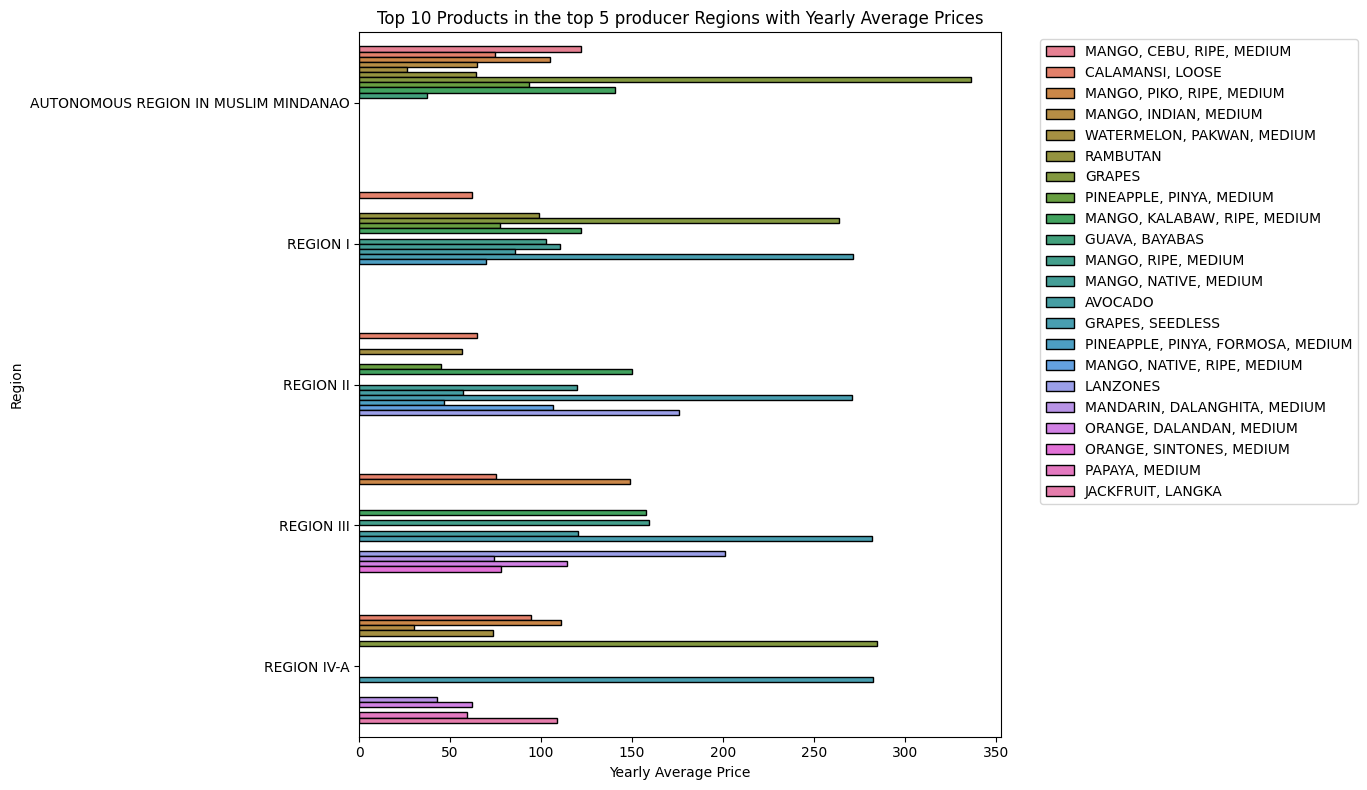

In [55]:
# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Create a bar plot for each region with outlines
sns.barplot(y='Region', x='Yearly Average', hue='Product', data=filtered_top_10_products, dodge=True, edgecolor='black')

# Set the title and labels
plt.title('Top 10 Products in the top 5 producer Regions with Yearly Average Prices')
plt.ylabel('Region')
plt.xlabel('Yearly Average Price')

# Display the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [31]:
# Filter the DataFrame for 'Dry' and 'Rainy' values in 'More Expensive In' column
top_10_dry = top_10_products_per_region[top_10_products_per_region['More Expensive In'] == 'Dry'].nlargest(20, 'Yearly Average')
top_10_rainy = top_10_products_per_region[top_10_products_per_region['More Expensive In'] == 'Rainy'].nlargest(20, 'Yearly Average')

# Display the results
top_10_dry

Season,Region,Product,Dry,Rainy,Yearly Average,Abs Difference,More Expensive In
6,AUTONOMOUS REGION IN MUSLIM MINDANAO,GRAPES,336.459524,335.671429,336.065476,0.788095,Dry
69,REGION IV-A,"GRAPES, SEEDLESS",285.622619,278.762143,282.192381,6.860476,Dry
64,REGION III,"GRAPES, SEEDLESS",284.811238,278.977024,281.894131,5.834214,Dry
32,National Capital Region,GRAPES,261.397667,258.674286,260.035976,2.723381,Dry
98,REGION VI,"MANGO, KALABAW, RIPE, MEDIUM",183.057476,170.041071,176.549274,13.016405,Dry
30,National Capital Region,AVOCADO,180.887000,158.008095,169.447548,22.878905,Dry
57,REGION III,"MANGO, RIPE, MEDIUM",166.751714,151.794524,159.273119,14.957190,Dry
88,REGION V,"MANGO, RIPE, MEDIUM",160.217619,154.694881,157.456250,5.522738,Dry
61,REGION III,"MANGO, KALABAW, RIPE, MEDIUM",161.703048,153.082381,157.392714,8.620667,Dry
99,REGION VI,"MANGO, CEBU, RIPE, MEDIUM",159.892333,152.215476,156.053905,7.676857,Dry


In [32]:
top_10_rainy

Season,Region,Product,Dry,Rainy,Yearly Average,Abs Difference,More Expensive In
146,REGION XII,"GRAPES, SEEDLESS",318.775238,325.753690,322.264464,6.978452,Rainy
71,REGION IV-A,GRAPES,283.089476,286.222976,284.656226,3.133500,Rainy
41,REGION I,"GRAPES, SEEDLESS",267.643333,274.708690,271.176012,7.065357,Rainy
49,REGION II,"GRAPES, SEEDLESS",267.028524,274.710238,270.869381,7.681714,Rainy
22,MIMAROPA REGION,"GRAPES, SEEDLESS",264.601810,273.337143,268.969476,8.735333,Rainy
44,REGION I,GRAPES,262.075952,265.467381,263.771667,3.391429,Rainy
65,REGION III,LANZONES,198.056429,203.671190,200.863810,5.614762,Rainy
54,REGION II,LANZONES,173.695810,178.349762,176.022786,4.653952,Rainy
33,National Capital Region,"MANGO, KALABAW, RIPE, MEDIUM",161.796048,163.069048,162.432548,1.273000,Rainy
13,Cordillera Administrative Region,"ORANGE, SINTONES, MEDIUM",117.403333,119.936667,118.670000,2.533333,Rainy


  Season  Average Price
0    Dry     104.378691
1  Rainy      80.838929


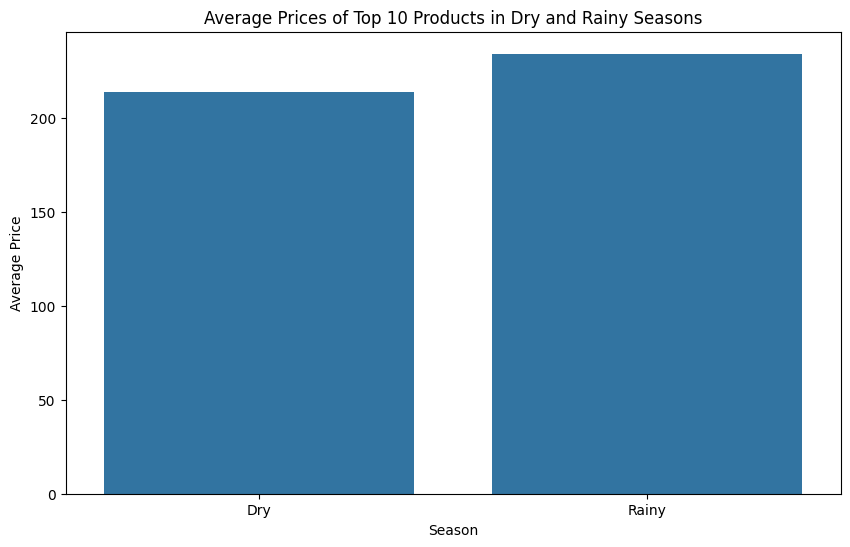

In [43]:
# Calculate the average price for the top 10 products in dry and rainy seasons
avg_comparison = top_10_products_per_region.groupby('More Expensive In')['Yearly Average'].mean().reset_index()
avg_comparison.columns = ['Season', 'Average Price']

# Display the DataFrame
print(avg_comparison)

# Calculate the average price for the top 10 products in dry and rainy seasons
avg_comparison = pd.DataFrame({
    'Season': ['Dry', 'Rainy'],
    'Average Price': [top_10_dry['Yearly Average'].mean(), top_10_rainy['Yearly Average'].mean()]
})

# Plot the comparison using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Average Price', data=avg_comparison)
plt.title('Average Prices of Top 10 Products in Dry and Rainy Seasons')
plt.ylabel('Average Price')
plt.xlabel('Season')
plt.show()


In [56]:
# Get the top products per region based on Yearly Average price
top_products_per_region = top_10_products_per_region.groupby('Region').apply(
    lambda x: x.nlargest(1, 'Yearly Average')
).reset_index(drop=True)

# Display the resulting DataFrame
top_products_per_region

Season,Region,Product,Dry,Rainy,Yearly Average,Abs Difference,More Expensive In
0,AUTONOMOUS REGION IN MUSLIM MINDANAO,GRAPES,336.459524,335.671429,336.065476,0.788095,Dry
1,Cordillera Administrative Region,"MANGO, RIPE, MEDIUM",153.011238,148.356548,150.683893,4.654690,Dry
2,MIMAROPA REGION,"GRAPES, SEEDLESS",264.601810,273.337143,268.969476,8.735333,Rainy
3,National Capital Region,GRAPES,261.397667,258.674286,260.035976,2.723381,Dry
4,REGION I,"GRAPES, SEEDLESS",267.643333,274.708690,271.176012,7.065357,Rainy
5,REGION II,"GRAPES, SEEDLESS",267.028524,274.710238,270.869381,7.681714,Rainy
6,REGION III,"GRAPES, SEEDLESS",284.811238,278.977024,281.894131,5.834214,Dry
7,REGION IV-A,GRAPES,283.089476,286.222976,284.656226,3.133500,Rainy
8,REGION IX,"MANGO, KALABAW, RIPE, MEDIUM",132.780619,117.916310,125.348464,14.864310,Dry
9,REGION V,"MANGO, RIPE, MEDIUM",160.217619,154.694881,157.456250,5.522738,Dry
